# Représentation des graphes

On discute des représentations de graphes dans Python. La librairie principale pour analyser des graphes y est [networkx](https://networkx.org/), que l'on va utiliser ici surtout pour ses capacités à [générer les images des graphes](https://networkx.org/documentation/stable/auto_examples/basic/plot_simple_graph.html). [D'autres solutions](https://stackoverflow.com/questions/7670280/tree-plotting-in-python) permettant d'imager les graphes existent.

Ce que l'on appelera représentation d'un graphe est plutôt du ressort de la formalisation mathématique du graphe sous la forme d'une liste d'ajacence, ou d'une matrice d'ajacence. 

## Graphe

Un [graphe](https://fr.wikipedia.org/wiki/Graphe_(math%C3%A9matiques_discr%C3%A8tes)) est une collection de sommets $V$ (ou noeuds ou points, _vertex_ en anglais et plus rarement _nodes_) reliés par un ensemble d'arêtes $E$ (ou bords, lignes, liens, ..., en anglais _edges_ parfois _links_) et noté sous la forme $G=\left(V,E\right)$.

On va ci-dessous générer un graphe composé de 14 arêtes reliant aléatoirement 2 des 12 noeuds possibles. Si un noeud n'apparaît pas comme départ ou arrivée d'une arrête, ce noeud n'apparaîtra pas dans le graphe.

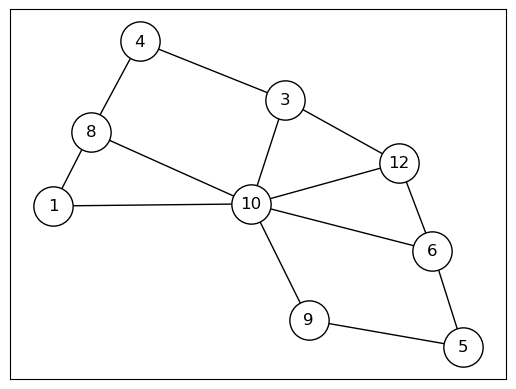

In [1]:
from random import randint

import networkx as nx
import matplotlib.pyplot as plt

def random_graph(nb_arêtes = 14, 
                 noeud_min = 1, 
                 noeud_max = 12):
    
    G = nx.Graph()
    
    assert noeud_min <= noeud_max

    for _ in range(nb_arêtes):
        départ = randint(noeud_min, noeud_max) 
        arrivée = randint(noeud_min, noeud_max)
        # interdire les boucles
        while départ == arrivée:
            départ = randint(noeud_min, noeud_max) 
            arrivée = randint(noeud_min, noeud_max)
        G.add_edge(départ, arrivée)
    
    return G

G = random_graph()

options = {
    "font_size": 12,
    "node_size": 800,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}
    
nx.draw_networkx(G, **options)

## Exemples de graphes

La notion de graphe prend son sens dans l'attribution de propriétés aux noeuds et/ou aux arrêtes. Par exemple, si chaque noeud représente un serveur, et chaque arrête représente un câble, alors le graphe représente un réseau informatique. Si de plus chaque câble a ses propres capacités de transfert d'information (débit), alors on peut associer cette propriété à chacune des arrêtes. On peut alors calculer par exemple la meilleure stratégie pour faire passer le maximum d'information d'un noeud départ à un noeud d'arrivée pour ce [graphe de flot](https://fr.wikipedia.org/wiki/Th%C3%A9orie_des_graphes#Flots_dans_les_r%C3%A9seaux). Si la quantités d'informations d'un serveur $A$ à un autre $B$ n'est pas la même que dans l'autre sens (que l'on songe au download/upload d'internet), on sera obligé de distinguer l'arrête allant de $A$ à $B$ de l'arrête allant de $B$ à $A$. On parle dans ce cas de graphe orienté.

Un autre exemple de graphe permet de représenter les relations d'amitiés entre individus. Les individus sont alors représentés par les noeuds du graphe, tandis que les relations d'amitiés sont représentées par les arrêtes. Il n'y a pas nécessairement besoin d'indiquer une quantité pour quantitifer l'amitié : elle existe ou pas. En général l'amitié est reciproque. Dans ce cas, on parle de graphe non-orienté.

Enfin, donnons l'exemple de l'arbre généalogique, pour lequel chaque enfant (un noeud) n'est relié qu'à un seul couple de parents. Chaque parent est lui-même un enfant (évitons la problématique de l'origine de l'espèce) qui peut donner naissance à plusieurs enfant. Cet arbre est représenté par des noeuds (les individus) et des accouplements (au sens biologique) donnant naissance à un nouveau noeuds. On peut représenter ces filiations comme un graphe multivarié (il y a plusieurs types de noeuds) ou sous la forme de deux graphes, un pour les pères et un pour les mères (on parle alors de bigraphe) que l'on peut représenter sous la forme d'un arbre (chaque enfant n'a qu'un seul _père_ et une seule _mère_).

## Lexique succint des graphes

Ce graphe **non-orienté** est constitué d'arrêtes non-orientées : si le noeud $A$ est relié au noeud $B$, alors le noeud $B$ est relié au noeud $A$. Il pourrait en revanche être constitué de plusieurs **sous-graphes**, qui seraient des parties isolées du reste du graphe (on dit que le graphe est déconnecté, ou **non-connexe**).

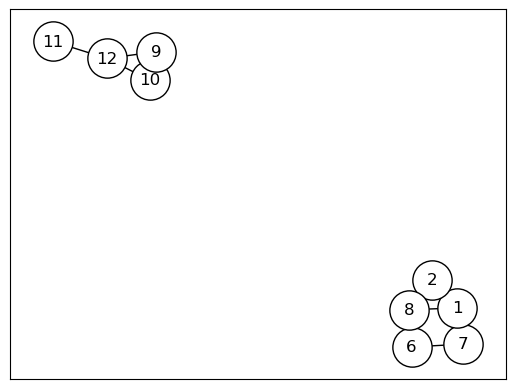

In [2]:
G1 = random_graph(6,1,8)
G2 = random_graph(6,9,12)

G = nx.union(G1,G2)

nx.draw_networkx(G, **options)

Un **chemin** est une succession d'arrêtes reliant une série de noeud sans qu'il y ait interruption (ou absence de noeud). Un **cycle** (ou une **boucle**) est une succession de noeuds reliés entre eux, et dont un noeud est croisé (au moins) deux fois lorsque l'on suit un chemin. Autrement dit, c'est un chemin fermé, ou un chemin repassant au moins deux fois par un noeud.

On extrait ci-dessous un cycle du graphe aléatoire généré. Il peut en exister d'autre, mais la librairie `networkx` se satisfait du premier qu'elle découvre. 

cycle : [(6, 8), (8, 10), (10, 12), (12, 6)]


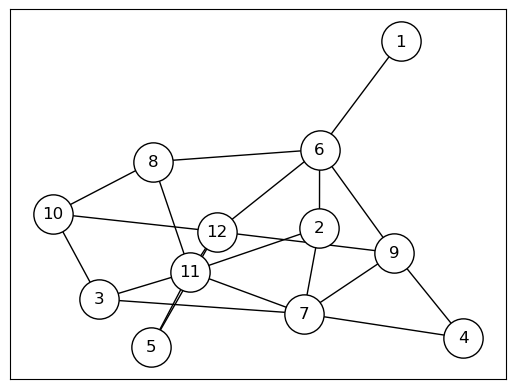

In [3]:
G = random_graph(24,1,12)
# trouver un cycle
while not nx.find_cycle(G):
    G = random_graph(24,1,12)
    
nx.draw_networkx(G, **options)
print("cycle : {}".format(nx.find_cycle(G)))

Un graphe est dit **orienté** lorsque les arêtes sont orientées. Dans ce cas, si le noeud $A$ est relié au noeud $B$ par l'arrête orientiée $AB$, rien ne garantit que $B$ sera relié à $A$. Si seule l'arrête $AB$ existe (et pas l'arrête $BA$), on ne pourra pas relier les noeuds $B$ et $A$ directement dans ce sens, mais la liaison entre $A$ et $B$ existera bien.

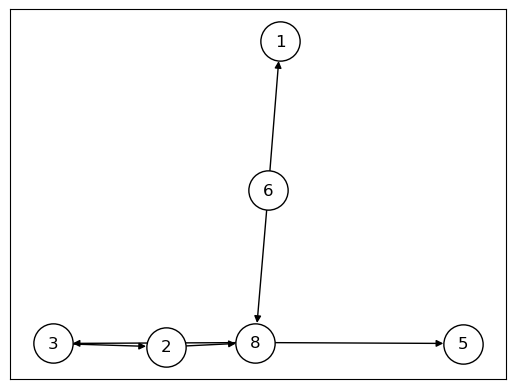

In [4]:
G = nx.DiGraph()

nb_arêtes = 6
nb_noeuds = 8

for _ in range(nb_arêtes):
    départ = randint(1, nb_noeuds) 
    arrivée = randint(1, nb_noeuds)
    # interdire les boucles
    while départ == arrivée:
        départ = randint(1, nb_noeuds) 
        arrivée = randint(1, nb_noeuds)
    G.add_edge(départ, arrivée)

nx.draw_networkx(G, **options)

Pour un graphe orienté, il y a une relation de hiérarchie naturelle entre les noeuds : le noeud de départ de la flèche est appelé **noeud parent** tandis que le noeud d'arrivée de la flèche est appelé **noeud enfant**. Si pour chaque noeud il n'y a qu'un seul ou aucun parent, on parle d'**arbre**. Le noeud n'ayant pas de parent d'un arbre connexe est appelé noeud racine, ou simplement **racine** de l'arbre. L'ensemble des noeuds n'ayant pas d'enfant d'un arbre connexe sont appelé noeuds feuilles, ou simplement **feuilles** de l'arbre.

Les arbres non-cycliques sont parmis les structures de graphes les plus simples qu'il soit permis d'étudier.

Un [lexique complet des termes de la théorie des graphes est disponible sur Wikipédia](https://fr.wikipedia.org/wiki/Lexique_de_la_th%C3%A9orie_des_graphes)

## Représentation mathématique des graphes

On représente les graphes essentiellement par une [liste d'ajacence](https://fr.wikipedia.org/wiki/Liste_d%27adjacence) ou une [matrice d'ajacence](https://fr.wikipedia.org/wiki/Matrice_d%27adjacence). Dans les deux cas il s'agit de représenter les voisins de chaque noeud, soit sous la forme d'une liste, soit sous la forme d'une matrice. 

Par exemple le graphe non-orienté

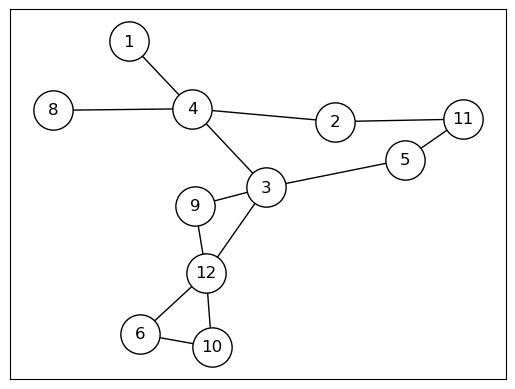

In [5]:
G = random_graph()

nx.draw_networkx(G, **options)

a pour liste d'adjacence (ici sous la forme d'un dictionnaire)

In [6]:
adjacency_list = {}
for (start, stop) in G.edges:
    if start in adjacency_list:
        adjacency_list[start].append(stop)
    else:
        adjacency_list[start] = [stop,]
    # le graphe est non-orienté
    if stop in adjacency_list:
        adjacency_list[stop].append(start)
    else:
        adjacency_list[stop] = [start,]

adjacency_list

{4: [2, 8, 1, 3],
 2: [4, 11],
 8: [4],
 1: [4],
 3: [4, 12, 5, 9],
 11: [2, 5],
 12: [10, 3, 9, 6],
 10: [12, 6],
 9: [12, 3],
 6: [12, 10],
 5: [3, 11]}

et pour matrice d'adjacence

In [7]:
nb_noeuds = max(G.nodes)
adjacency_matrix = [[0,]*nb_noeuds for _ in range(nb_noeuds)]
for (start, stop) in G.edges:
    adjacency_matrix[start-1][stop-1] = 1
    adjacency_matrix[stop-1][start-1] = 1

string = '\n'.join(' '.join(str(coeff) for coeff in line) 
                   for line in adjacency_matrix)
print(string)

0 0 0 1 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0 1 0
0 0 0 1 1 0 0 0 1 0 0 1
1 1 1 0 0 0 0 1 0 0 0 0
0 0 1 0 0 0 0 0 0 0 1 0
0 0 0 0 0 0 0 0 0 1 0 1
0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0 0 0
0 0 1 0 0 0 0 0 0 0 0 1
0 0 0 0 0 1 0 0 0 0 0 1
0 1 0 0 1 0 0 0 0 0 0 0
0 0 1 0 0 1 0 0 1 1 0 0


```{admonition} Forme générale de la matrice d'adjacence
:class: tip
Une matrice d'adjacence $A$ est forcément carrée (elle a autant de lignes que de colonnes) puisqu'elle met en correspondance tous les noeuds du graphe entre eux. Sa taille est donc nécessairement égale à  $\left|V\right|\times\left|V\right|$, où $\left|V\right|$ représente le nombre de noeud du graphe.
```

### Graphe orienté et non-orienté

La notion de graphe orienté et non-orienté prend un sens immédiat en terme de matrice d'ajdacence. En effet, la matrice d'ajacence d'un graphe non-orienté sera forcément symmétrique par définition.  

```{admonition} Matrice symmétrique
:class: tip
Une matrice $A$ d'élément $\left(A\right)_{ij}$ ($i$-ième ligne, $j$_ième colonne) est dite symmétrique si elle vérifie $\left(A\right)_{ij}$ = $\left(A\right)_{ji}$.
```

Un graphe non-orienté dont le $i$-ième noeud et le $j$-ième noeud sont connecté aura forcément l'élément $\left(A\right)_{ij}$ de sa matrice d'ajacence $A$ non-nul. Par définition de la non-orientation des arrêtes, l'élément $\left(A\right)_{ji}$ sera également non-nul, et égale à $\left(A\right)_{ij}$.

Ainsi, vérifier qu'un graphe est non-orienté à l'aide d'une matrice d'adjacence est relativement facile puisqu'il s'agit de vérifier un nombre fini d'égalité (égale au carré du nombre de noeuds $\left|V\right|^2$ du graphe, qui correspond au nombre d'éléments de la matrice d'adjacence), tandis que la vérification demande un peu plus d'efforts dans le cas de la liste d'adjacence puisqu'il faut vérifier que pour chaque voisin de chaque noeud, il existe une arrête inverse.

In [8]:
def est_non_orienté(adjacence):
    if type(adjacence) == list:
        return all(adjacence[i][j] == adjacence[j][i]
                   for i in range(len(adjacence))
                   for j in range(len(adjacence)))
    elif type(adjacence) == dict:
        for noeud, voisins in adjacence.items():
            for voisin in voisins:
                if noeud not in adjacence[voisin]:
                    return False
        return True

string = "Matrice d'ajacence symmétrique : "
string += f"{est_non_orienté(adjacency_matrix)}\n"
string += "Liste d'ajacence symmétrique : "
string += f"{est_non_orienté(adjacency_list)}"
print(string)

Matrice d'ajacence symmétrique : True
Liste d'ajacence symmétrique : True


### Liste ou matrice d'ajacence : Quelle représentation choisir ?

Plus un graphe sera dense (plus il aura de connections entre ses différents noeuds), plus la représentation en matrice sera pertinente. Par exemple le graphe

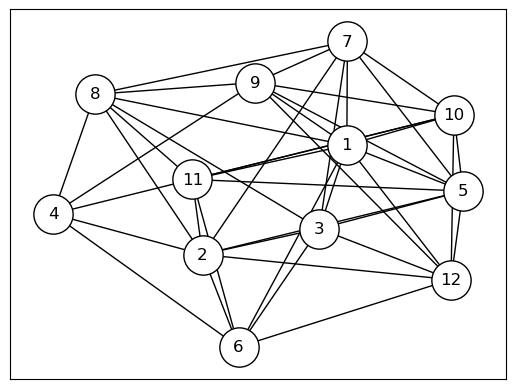

In [9]:
G = random_graph(75)

nx.draw_networkx(G, **options)

est peut-être plus économiquement stocké sous forme de matrice d'ajacence

In [10]:
nb_noeuds = max(G.nodes)
adjacency_matrix = [[0,]*nb_noeuds for _ in range(nb_noeuds)]
for (start, stop) in G.edges:
    adjacency_matrix[start-1][stop-1] = 1
    adjacency_matrix[stop-1][start-1] = 1

string = '\n'.join(' '.join(str(coeff) for coeff in line) 
                   for line in adjacency_matrix)
print(string)

0 0 1 0 1 1 1 1 1 1 1 1
0 0 1 1 1 1 1 1 0 0 1 1
1 1 0 0 1 1 1 1 0 0 0 1
0 1 0 0 0 1 0 1 1 1 0 0
1 1 1 0 0 0 1 0 1 1 1 1
1 1 1 1 0 0 0 0 0 0 1 1
1 1 1 0 1 0 0 1 1 1 0 0
1 1 1 1 0 0 1 0 1 0 1 0
1 0 0 1 1 0 1 1 0 1 0 1
1 0 0 1 1 0 1 0 1 0 1 1
1 1 0 0 1 1 0 1 0 1 0 0
1 1 1 0 1 1 0 0 1 1 0 0


que de liste d'ajacence

In [11]:
adjacency_list = {}
for (start, stop) in G.edges:
    if start in adjacency_list:
        adjacency_list[start].append(stop)
    else:
        adjacency_list[start] = [stop,]
    # le graphe est non-orienté
    if stop in adjacency_list:
        adjacency_list[stop].append(start)
    else:
        adjacency_list[stop] = [start,]

adjacency_list

{12: [6, 9, 1, 5, 3, 10, 2],
 6: [12, 3, 1, 4, 2, 11],
 9: [12, 5, 4, 1, 10, 7, 8],
 1: [12, 6, 9, 8, 11, 7, 3, 5, 10],
 5: [12, 9, 1, 3, 11, 7, 10, 2],
 3: [12, 6, 1, 7, 2, 5, 8],
 10: [12, 9, 1, 5, 7, 4, 11],
 2: [12, 6, 3, 5, 7, 4, 8, 11],
 4: [6, 9, 2, 8, 10],
 11: [6, 1, 5, 2, 10, 8],
 7: [9, 1, 3, 5, 10, 8, 2],
 8: [9, 1, 3, 7, 4, 2, 11]}

Moins le graphe sera dense, plus la représentation en liste d'adjacence sera pertinente. Il existe d'ailleurs des objets intermédiares permettant de représenter les données sous forme de matrices dont seuls les éléments non nuls seront stockés : ce sont les [matrices creuses, ou matrice parcimonieuses](https://fr.wikipedia.org/wiki/Matrice_creuse). Leur représentation utilise la librarie [scipy.sparse](https://docs.scipy.org/doc//scipy/reference/sparse.html) de Python, qui permet également de faire quelques calculs sur les graphes représentés sous forme de matrice d'adjacence creuse. 

La matrice d'ajacence présente une autre caractéristique que n'a pas (sous la forme présentée ci-dessus) la liste d'adjacence : l'élément $\left(A\right)_{ij}$ de la matrice d'adjacence peut représenter la distance (ou poids) entre les noeuds, tandis qu'une liste d'adjacence doit être augmentée  

## Représentation numérique des graphes

Les représentations d'un graphe sous la forme d'une liste ou d'une matrice d'adjacence ont des équivalences directe avec les dictionnaires ou tableau à deux dimensions (liste de listes) dans n'importe quel langage informatique. On peut néanmoins choisir de représenter les graphes sous la forme d'une collection de noeuds (ou d'arrêtes, mais les deux représentations sont alors équivalentes), et de représenter chaque noeud sous la forme d'un objet ayant des attributs représentatif du graphe.

Un graphe dont chaque noeud n'aurait qu'un voisin au dessus et un seul voisin au dessous pourra par exemple se représenter à l'aide d'une collection d'objets très simples ayant pour représentation un noeud binaire 

In [12]:
class BinaryNode(object):
    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

tandis qu'un graphe qui aurait plusieurs enfants et plusieurs parents associés se représenterait comme

In [13]:
class MultiNode(object):
    def __init__(self, parents=[], children=[]):
        self.parents = list(parents)
        self.children = list(children)

Évidemment, toutes les formes intermédiaires sont permises (par exemple forcer un seul parent, mais avoir plusieurs enfants consisterait en un noeud ayant un object unique dans l'attribut `parent` et une liste pour l'attribut `children`), et la nomenclature des attributs n'est pas normalisée (par exemple `left` et `right` pourraient s'appeler `parent` et `child`).

Un graphe est alors une collection de ces types de noeuds, qui ne sont que des objets conteneurs. On verra dans le prochain chapitre comment parcourir les graphes pour en extraire les informations qui y sont encodées. La représentation la plus adaptée est forcément liée à la tâche que l'on souhaite accomplir avec les données dont on dispose.

On peut proposer des noeuds beaucoup plus complexes, comme dans le cas de la représentation des [graphes MPM](https://cpa.enset-media.ac.ma/methode_mpm.htm), qui auraient alors des noeuds de la forme

In [14]:
from typing import List

class NoeudMPM(object):
    """Noeud d'un graphe de type Méthode des Potentiels et antécédents Métra (MPM),
    voir https://fr.wikipedia.org/wiki/M%C3%A9thode_des_potentiels_m%C3%A9tra"""
    
    def __init__(self,
                 durée: float = 0.0,
                 date_au_plus_tôt: float = 0.0,
                 date_au_plus_tard: float = 0.0,
                 prédécesseurs: List[object] = [],
                 successeurs: List[object] = [],
                 ):
        self.date_au_plus_tôt = int(date_au_plus_tôt)
        self.date_au_plus_tard = int(date_au_plus_tard)
        self.durée = int(durée)
        self.prédécesseurs = list(prédécesseurs)
        self.successeurs = list(successeurs)
        return None
        
    def __repr__(self):
        return self.nom+'({},{};{})'.format(self.date_au_plus_tôt, 
                                            self.date_au_plus_tard,
                                            self.durée)
    
    def calcule_date_au_plus_tôt(self):
        if self.prédécesseurs:
            max_date = max(self.prédécesseurs, 
                           key = lambda x: x.date_au_plus_tôt + x.durée)
            add_date = max_date.date_au_plus_tôt + max_date.durée
            self.date_au_plus_tôt = add_date
        else:
            self.date_au_plus_tôt = 0
        return self.date_au_plus_tôt
    
    def calcule_date_au_plus_tard(self):
        if self.successeurs:
            min_date = min(self.successeurs, 
                           key = lambda x: x.date_au_plus_tard)
            min_date = min_date.date_au_plus_tard
            self.date_au_plus_tard = min_date - self.durée
        else:
            self.date_au_plus_tard = self.date_au_plus_tôt
        return self.date_au_plus_tôt        

**Attention**, le français et les accents sont acceptés par Python. Ce n'est pas le cas de la plupart des autres langages.

Puisque les dates au plus tôt et au plus tard peuvent se calculer uniquement à l'aide des attributs du noeud actuellement exploré, on peut associer leurs méthodes de calcul directement dans l'objet `NoeudMPM`. En revanche, l'ordre d'exploration du graphe doit être fait dans un algorithme à part. Par exemple, pour calculer la date au plus tôt d'un noeud, il faut s'assurer que l'ensemble des dates au plus tôt de l'ensemble des prédécesseurs aient été calculées. Identiquement pour les dates au plus tard et les successeurs du noeud en cours de calcul.

Quelques remarques sur la classe ci-dessus:
 
 - Puisque la `date_au_plus_tôt` par défaut est `0`, le `else` de la méthode `calcule_date_au_plus_tôt` est redondant. Ce n'est pas le cas de la méthode `calcule_date_au_plus_tard`.
 - La durée est une grandeur indispensable au calcul de toutes les autres quantités, on aurait pu mettre l'attribut `durée` en attribut sans valeur par défaut (argument positionnel) pour forcer son remplissage à l'instanciation du noeud.
 - En principe la donnée de tous les noeuds du graphe permet, à partir de la liste de `prédécesseurs` de l'ensemble des noeuds, de générer automatiquement la liste des tous les `successeurs` de tous les noeuds. Pour le graphe MPM donc, on aurait pu ne pas associer les deux attributs `prédécesseurs` et `successeurs`, et seulement construire le deuxième à partir du premier à la volée. 
 - Python autorise de générer un nouvel attribut d'une instance d'objet à la volée. Il n'est en ce sens pas obligatoire de mettre des attributs `date_au_plus_tôt` et `date_au_plus_tard` dans l'`__init__`  de la fonction, ils auraient été générés par les méthodes `calcule_date_au_plus_tôt` et `calcule_date_au_plus_tard` dans tous les cas. On peut aussi vouloir utiliser le décorateur [`property`](https://docs.python.org/3/library/functions.html#property) pour réaliser des opérations intermédiaires.